In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import set_matplotlib_hangul # 이건 내가 만든 것
%matplotlib inline

Hangul OK in your Windows!


---
# 배달 데이터 분석

### 데이터 소개
- KT 통신 빅데이터 플랫폼 (https://www.bigdata-telecom.kr/)
1. 업종 목적지별 배달 주문건수
    - 날짜, 시간, 배달 유형, 시/도, 시/구, 배달건수
    - 총 1,026,046개
    - 이 중 서울 데이터: 167,802개
2. 주문지역 기상 정보
    - ID, 도시 코드, 시/도, 시/구, 날짜, 시간, 날씨, 습도, 강우량, 기온, 풍속, 바람 세기, 풍향 방위, 풍향 방위각, 바람 분류  
    - 총 1,606,750개
    - 이 중 서울 데이터: 160,675개

### 프로젝트 과정
1. Python에서 두 데이터셋을 읽고 간략한 정리 후, AWS 서버에 생성한 MySQL DB에 두 데이터셋을 전송하고 저장
2. MySQL에서 데이터 전처리, 가공 및 EDA 진행
3. 처리된 데이터를 Python에서 불러와 EDA 내용 시각화

## 업종 목적지별 배달 주문건수 데이터

In [55]:
# 데이터 읽기
col_names = ['date','hour_time','deliver_type','dosi','sigu','count']
deliver_count = pd.read_csv('./업종 목적지별 배달 주문건수_2021.csv', encoding='utf-8', names=col_names, header=None)
print(deliver_count.info())
deliver_count.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026046 entries, 0 to 1026045
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   date          1026046 non-null  object
 1   hour_time     1026046 non-null  int64 
 2   deliver_type  1026046 non-null  object
 3   dosi          1026046 non-null  object
 4   sigu          1026046 non-null  object
 5   count         1026046 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 47.0+ MB
None


,date,hour_time,deliver_type,dosi,sigu,count
0,2021-01-01,0,돈까스/일식,경기도,동두천시,3
1,2021-01-01,0,돈까스/일식,경기도,부천시,49
2,2021-01-01,0,돈까스/일식,경기도,안산시 상록구,5
3,2021-01-01,0,돈까스/일식,경기도,의정부시,6
4,2021-01-01,0,돈까스/일식,경상남도,진주시,3


In [58]:
# 서울 데이터만 추출
seoul_deliver_count = deliver_count[deliver_count['dosi'].str.contains('서울')]
seoul_deliver_count

,date,hour_time,deliver_type,dosi,sigu,count
6,2021-01-01,0,돈까스/일식,서울특별시,구로구,4
7,2021-01-01,0,돈까스/일식,서울특별시,영등포구,1
8,2021-01-01,0,돈까스/일식,서울특별시,은평구,5
13,2021-01-01,0,배달전문업체,서울특별시,동작구,2
14,2021-01-01,0,배달전문업체,서울특별시,서초구,1
...,...,...,...,...,...,...
1026009,2021-07-31,23,패스트푸드,서울특별시,서초구,1
1026010,2021-07-31,23,패스트푸드,서울특별시,양천구,1
1026037,2021-07-31,23,한식,서울특별시,관악구,1
1026038,2021-07-31,23,한식,서울특별시,금천구,1


In [77]:
# date 컬럼 datetime으로 변환
seoul_deliver_count['date'] = pd.to_datetime(seoul_deliver_count['date'])
seoul_deliver_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167802 entries, 0 to 167801
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          167802 non-null  datetime64[ns]
 1   hour_time     167802 non-null  int64         
 2   deliver_type  167802 non-null  object        
 3   dosi          167802 non-null  object        
 4   sigu          167802 non-null  object        
 5   count         167802 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.7+ MB


In [139]:
# 요일 컬럼 추가
seoul_deliver_count['dayweek'] = seoul_deliver_count['date'].apply(lambda x: x.strftime('%A'))
seoul_deliver_count.head(2)

,date,hour_time,deliver_type,dosi,sigu,count,dayweek
0,2021-01-01,0,돈까스/일식,서울특별시,구로구,4,Friday
1,2021-01-01,0,돈까스/일식,서울특별시,영등포구,1,Friday


In [3]:
# seoul_deliver_count.to_csv('seoul_delivery_count_2021.csv', sep=',', index=False) # 데이터 csv 파일로 저장

# seoul_deliver_count = pd.read_csv('./seoul_delivery_count_2021.csv', encoding='utf-8', parse_dates=['date'], infer_datetime_format=True) # 저장 확인
# print(seoul_deliver_count.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167802 entries, 0 to 167801
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          167802 non-null  datetime64[ns]
 1   hour_time     167802 non-null  int64         
 2   deliver_type  167802 non-null  object        
 3   dosi          167802 non-null  object        
 4   sigu          167802 non-null  object        
 5   count         167802 non-null  int64         
 6   dayweek       167802 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.0+ MB
None


In [141]:
seoul_deliver_count.tail()
# 7월 31일이 마지막

,date,hour_time,deliver_type,dosi,sigu,count,dayweek
167797,2021-07-31,23,패스트푸드,서울특별시,서초구,1,Saturday
167798,2021-07-31,23,패스트푸드,서울특별시,양천구,1,Saturday
167799,2021-07-31,23,한식,서울특별시,관악구,1,Saturday
167800,2021-07-31,23,한식,서울특별시,금천구,1,Saturday
167801,2021-07-31,23,한식,서울특별시,도봉구,1,Saturday


## 주문지역 기상 정보 데이터

In [68]:
# 데이터 읽기
col_names = ['no','city_code','dosi','sigu','date','hour_time','rain_type','humidity','precipitation','temperature','wind_speed','wind_strength','wind_direction','wind_directino_value','wind_category']
deliver_weather = pd.read_csv('./주문지역 기상 정보_20211013.csv', encoding='utf-8', names=col_names, header=None)
print(deliver_weather.info())
deliver_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606750 entries, 0 to 1606749
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   no                    1606750 non-null  int64  
 1   city_code             1606750 non-null  int64  
 2   dosi                  1606750 non-null  object 
 3   sigu                  1606750 non-null  object 
 4   date                  1606750 non-null  int64  
 5   hour_time             1606750 non-null  int64  
 6   rain_type             1606750 non-null  object 
 7   humidity              1606750 non-null  int64  
 8   precipitation         1606750 non-null  float64
 9   temperature           1606750 non-null  float64
 10  wind_speed            1606750 non-null  float64
 11  wind_strength         1606750 non-null  object 
 12  wind_direction        1606750 non-null  object 
 13  wind_directino_value  1606750 non-null  int64  
 14  wind_category         1606750 non-

,no,city_code,dosi,sigu,date,hour_time,rain_type,humidity,precipitation,temperature,wind_speed,wind_strength,wind_direction,wind_directino_value,wind_category
0,4020001,11110,서울특별시,종로구,20201109,0,없음,49,0.0,2.5,0.8,약,east,350,N
1,4020002,11140,서울특별시,중구,20201109,0,없음,49,0.0,2.5,0.8,약,east,350,N
2,4020003,11170,서울특별시,용산구,20201109,0,없음,48,0.0,4.8,0.9,약,none,358,N
3,4020004,11200,서울특별시,성동구,20201109,0,없음,33,0.0,4.7,0.5,약,east,283,WNW
4,4020005,11230,서울특별시,동대문구,20201109,0,없음,33,0.0,4.7,0.5,약,east,283,WNW


In [69]:
# 서울 데이터만 추출
seoul_deliver_weather = deliver_weather[deliver_weather['dosi'].str.contains('서울')]
seoul_deliver_weather.head()

,no,city_code,dosi,sigu,date,hour_time,rain_type,humidity,precipitation,temperature,wind_speed,wind_strength,wind_direction,wind_directino_value,wind_category
0,4020001,11110,서울특별시,종로구,20201109,0,없음,49,0.0,2.5,0.8,약,east,350,N
1,4020002,11140,서울특별시,중구,20201109,0,없음,49,0.0,2.5,0.8,약,east,350,N
2,4020003,11170,서울특별시,용산구,20201109,0,없음,48,0.0,4.8,0.9,약,none,358,N
3,4020004,11200,서울특별시,성동구,20201109,0,없음,33,0.0,4.7,0.5,약,east,283,WNW
4,4020005,11230,서울특별시,동대문구,20201109,0,없음,33,0.0,4.7,0.5,약,east,283,WNW


In [71]:
seoul_deliver_weather.tail(2)

,no,city_code,dosi,sigu,date,hour_time,rain_type,humidity,precipitation,temperature,wind_speed,wind_strength,wind_direction,wind_directino_value,wind_category
1606524,5626525,11650,서울특별시,서초구,20210831,2000,비,100,4.5,19.1,1.1,약,west,85,E
1606525,5626526,11680,서울특별시,강남구,20210831,2000,비,93,3.5,18.8,1.6,약,west,41,NE


In [129]:
# 불필요 컬럼 제거
seoul_deliver_weather.drop(columns=['no','city_code'],inplace=True)
seoul_deliver_weather.drop(columns=['wind_direction','wind_directino_value','wind_category'], inplace=True)

In [89]:
# date 컬럼 datetime 형식으로 변경
seoul_deliver_weather['date'] = pd.to_datetime(seoul_deliver_weather['date'], format='%Y%m%d')
seoul_deliver_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160675 entries, 0 to 1606525
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   no                    160675 non-null  int64         
 1   city_code             160675 non-null  int64         
 2   dosi                  160675 non-null  object        
 3   sigu                  160675 non-null  object        
 4   date                  160675 non-null  datetime64[ns]
 5   hour_time             160675 non-null  int64         
 6   rain_type             160675 non-null  object        
 7   humidity              160675 non-null  int64         
 8   precipitation         160675 non-null  float64       
 9   temperature           160675 non-null  float64       
 10  wind_speed            160675 non-null  float64       
 11  wind_strength         160675 non-null  object        
 12  wind_direction        160675 non-null  object        
 13

C:\Users\admin\AppData\Local\Temp/ipykernel_17524/1923775557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_deliver_weather['date'] = pd.to_datetime(seoul_deliver_weather['date'], format='%Y%m%d')


In [108]:
# hour_time 컬럼 seoul_deliver_count 데이터프레임의 hourly time 형태와 동일하게 변경
seoul_deliver_weather['hour_time'] = seoul_deliver_weather['hour_time'].apply(lambda x: int(x/100) if len(str(x))>2 else int(x))
seoul_deliver_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160675 entries, 0 to 1606525
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   no                    160675 non-null  int64         
 1   city_code             160675 non-null  int64         
 2   dosi                  160675 non-null  object        
 3   sigu                  160675 non-null  object        
 4   date                  160675 non-null  datetime64[ns]
 5   hour_time             160675 non-null  int64         
 6   rain_type             160675 non-null  object        
 7   humidity              160675 non-null  int64         
 8   precipitation         160675 non-null  float64       
 9   temperature           160675 non-null  float64       
 10  wind_speed            160675 non-null  float64       
 11  wind_strength         160675 non-null  object        
 12  wind_direction        160675 non-null  object        
 13

C:\Users\admin\AppData\Local\Temp/ipykernel_17524/2958316206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_deliver_weather['hour_time'] = seoul_deliver_weather['hour_time'].apply(lambda x: int(x/100) if len(str(x))>2 else int(x))


In [130]:
# index 재정렬
seoul_deliver_weather.reset_index(drop=True, inplace=True)

In [7]:
# seoul_deliver_weather.to_csv('seoul_deliver_weather_2021.csv', sep=',', index=False) # 데이터 csv 파일로 저장

# seoul_deliver_weather = pd.read_csv('./seoul_deliver_weather_2021.csv', encoding='utf-8', parse_dates=['date'], infer_datetime_format=True) # 저장 확인
# print(seoul_deliver_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160675 entries, 0 to 160674
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dosi           160675 non-null  object        
 1   sigu           160675 non-null  object        
 2   date           160675 non-null  datetime64[ns]
 3   hour_time      160675 non-null  int64         
 4   rain_type      160675 non-null  object        
 5   humidity       160675 non-null  int64         
 6   precipitation  160675 non-null  float64       
 7   temperature    160675 non-null  float64       
 8   wind_speed     160675 non-null  float64       
 9   wind_strength  160675 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 12.3+ MB
None


In [9]:
# 결측치 확인
seoul_deliver_weather.isna().sum()

dosi             0
sigu             0
date             0
hour_time        0
rain_type        0
humidity         0
precipitation    0
temperature      0
wind_speed       0
wind_strength    0
dtype: int64

## 두 배달 데이터 MySQL DB에 저장

In [3]:
import mysql.connector

# AWS 서버 DB에 접속/연결
remote = mysql.connector.connect(
    host = host,
    port = 3306,
    user = "admin",
    password = password,
    database = "sql_project"
)

In [142]:
# remote.close()

In [4]:
# seoul_deliver_count 데이터셋 다시 불러오기
seoul_deliver_count = pd.read_csv('./seoul_delivery_count_2021.csv', encoding='utf-8', parse_dates=['date'], infer_datetime_format=True)
print(seoul_deliver_count.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167802 entries, 0 to 167801
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          167802 non-null  datetime64[ns]
 1   hour_time     167802 non-null  int64         
 2   deliver_type  167802 non-null  object        
 3   dosi          167802 non-null  object        
 4   sigu          167802 non-null  object        
 5   count         167802 non-null  int64         
 6   dayweek       167802 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 9.0+ MB
None


In [145]:
seoul_deliver_count.head(1)

,date,hour_time,deliver_type,dosi,sigu,count,dayweek
0,2021-01-01,0,돈까스/일식,서울특별시,구로구,4,Friday


In [5]:
# AWS DB에 테이블 생성
cur = remote.cursor()
cur.execute("CREATE TABLE delivery_count (date date, hour_time int, deliver_type varchar(16), dosi varchar(8), sigu varchar(8), count int, dayweek varchar(16))")

In [6]:
# 생성한 테이블에 데이터 입력
sql = """INSERT INTO delivery_count VALUES (%s, %s, %s, %s, %s, %s, %s)"""
cursor = remote.cursor(buffered=True)

for i, row in seoul_deliver_count.iterrows():
    cursor.execute(sql, tuple(row))
    #print(tuple(row))

remote.commit()

In [10]:
# seoul_deliver_weather 데이터셋 다시 불러오기
seoul_deliver_weather = pd.read_csv('./seoul_deliver_weather_2021.csv', encoding='utf-8', parse_dates=['date'], infer_datetime_format=True) # 저장 확인
print(seoul_deliver_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160675 entries, 0 to 160674
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dosi           160675 non-null  object        
 1   sigu           160675 non-null  object        
 2   date           160675 non-null  datetime64[ns]
 3   hour_time      160675 non-null  int64         
 4   rain_type      160675 non-null  object        
 5   humidity       160675 non-null  int64         
 6   precipitation  160675 non-null  float64       
 7   temperature    160675 non-null  float64       
 8   wind_speed     160675 non-null  float64       
 9   wind_strength  160675 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 12.3+ MB
None


In [11]:
seoul_deliver_weather.head(1)

,dosi,sigu,date,hour_time,rain_type,humidity,precipitation,temperature,wind_speed,wind_strength
0,서울특별시,종로구,2020-11-09,0,없음,49,0.0,2.5,0.8,약


In [14]:
# AWS DB에 테이블 생성
cur = remote.cursor()
cur.execute("CREATE TABLE delivery_weather (dosi varchar(8), sigu varchar(8), date date, hour_time int, rain_type varchar(8), humidity int, precipitation float, temperatur float, wind_speed float, wind_strength varchar(8))")

In [15]:
# 생성한 테이블에 데이터 입력
sql = """INSERT INTO delivery_weather VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
cursor = remote.cursor(buffered=True)

for i, row in seoul_deliver_weather.iterrows():
    cursor.execute(sql, tuple(row))
    #print(tuple(row))

remote.commit()

## MySQL에서 데이터 전처리 및 EDA

- project_sql_process.sql 파일에 정리

## 전처리된 데이터 조회하여 분석 및 시각화

In [1]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.clcamugrgshn.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "admin",
    password = "0559440582",
    database = "sql_project" # 특정 Database로 바로 접속
)

In [57]:
import pandas as pd

cursor = remote.cursor(buffered=True)
cursor.execute("select * from delivery")

result = cursor.fetchall()
delivery = pd.DataFrame(result, columns=['date','month','hour','dayweek','dlvr_type','gu','count','rain_type','hmd','pcp','temp','wind_spd','wind_str','pcp_g','temp_g'])
delivery.head()

,date,month,hour,dayweek,dlvr_type,gu,count,rain_type,hmd,pcp,temp,wind_spd,wind_str,pcp_g,temp_g
0,2021-01-01,01,15,금요일,도시락,관악구,1,없음,58,0.0,0.1,1.2,약,0,0-10
1,2021-01-01,01,15,금요일,돈까스/일식,관악구,6,없음,58,0.0,0.1,1.2,약,0,0-10
2,2021-01-01,01,15,금요일,배달전문업체,관악구,1,없음,58,0.0,0.1,1.2,약,0,0-10
3,2021-01-01,01,15,금요일,분식,관악구,14,없음,58,0.0,0.1,1.2,약,0,0-10
4,2021-01-01,01,15,금요일,야식,관악구,2,없음,58,0.0,0.1,1.2,약,0,0-10


In [104]:
# remote.close()

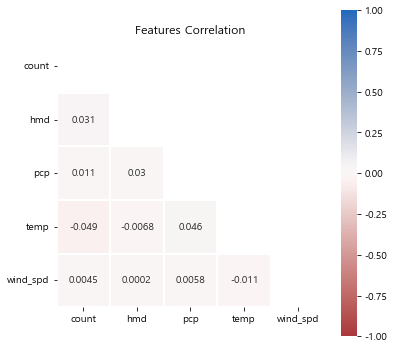

In [117]:
# 변수간 상관관계
colormap = 'vlag_r' #plt.cm.PuBu
plt.figure(figsize=(6,6))
plt.title("Features Correlation")
mask = np.triu(np.ones_like(delivery.drop(columns='hour').corr(), dtype=np.bool))
sns.heatmap(round(delivery.drop(columns='hour').corr(),4), 
            linewidths=0.1, vmax=1.0, vmin=-1.0, square=True, # square: 정사각형 모양
            mask=mask, cmap=colormap, linecolor='white', annot=True)
plt.yticks(rotation=0)
plt.show();

- 변수간 상관관계가 높은 변수들은 없는 것 같다

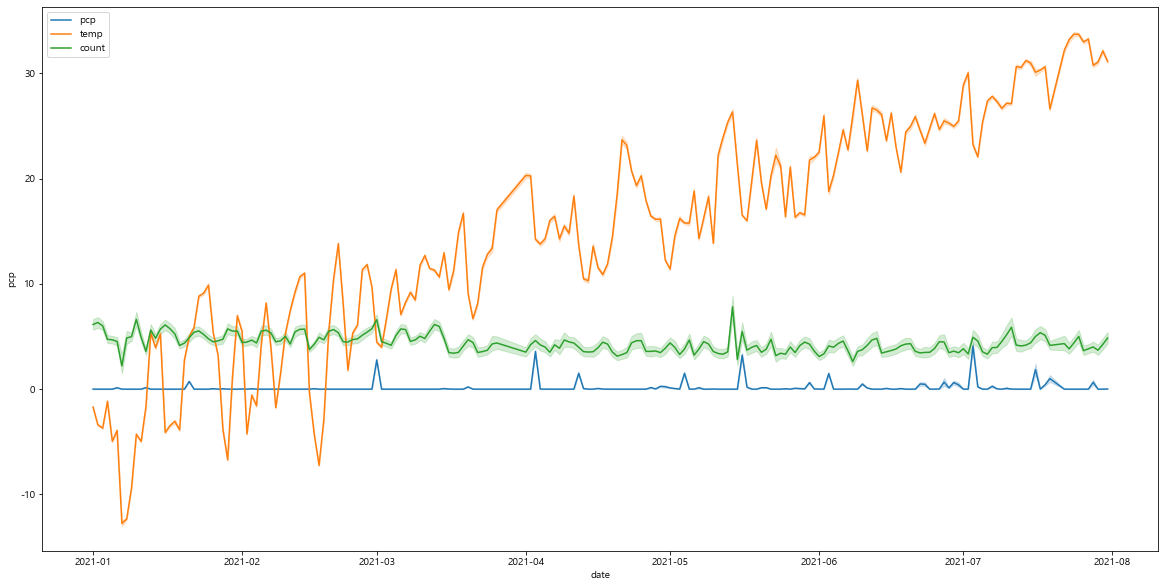

In [84]:
# 전체 강우량, 기온, 배달건수 데이터 시각화하여 조회
temp = delivery[['date','pcp','temp','count']]

plt.figure(figsize=(20,10))
sns.lineplot(x='date', y='pcp', data=temp, label='pcp')
sns.lineplot(x='date', y='temp', data=temp, label='temp')
sns.lineplot(x='date', y='count', data=temp, label='count')

plt.legend()
plt.show()

- 1월 ~ 7월까지의 배달건수 추이를 보면, 점차 감소한다. 날이 따듯해질 수록 배달주문이 감소하는 것으라 생각한다.
- 강우량이 높은 시간대엔 배달건수도 증가하는 경향이 보인다.

In [6]:
# 월별 총 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select month, sum(count) \
    from delivery \
    group by month")
df = pd.DataFrame(cursor.fetchall(), columns=['month','count'])
df

,month,count
0,01,191864
1,02,166934
2,03,116945
3,04,59792
4,05,61643
5,06,60295
6,07,69276


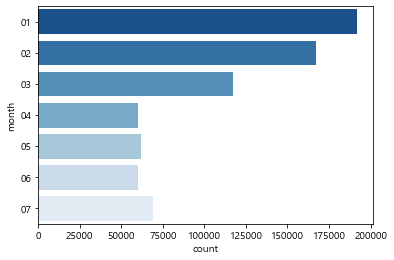

In [7]:
sns.barplot(data=df, x='count', y='month', palette='Blues_r');

- 월별로 보더라도, 날씨가 추운 1월, 2월, 그리고 3월에 배달건수가 가장 많은 것을 볼 수 있다.

In [9]:
# 기온에 따른 시간당 평균 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select temp_g, sum(count), avg(count) \
    from delivery \
    group by temp_g")
df = pd.DataFrame(cursor.fetchall(), columns=['temp','count_total' ,'count_avg'])
df

,temp,count_total,count_avg
0,0-10,232720,5.0152
1,-10-0,135158,5.0475
2,-10 미만,3972,4.1855
3,10-20,197669,4.5442
4,20-30,116472,4.0045
5,30-40,40758,4.5121


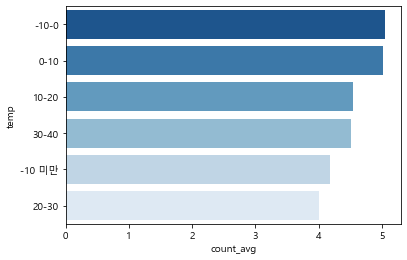

In [14]:
sns.barplot(data=df.sort_values(by='count_avg', ascending=False), x='count_avg', y='temp', palette='Blues_r');

- 기온이 영하 -10도에서 영상 10도 사이일 때, 시간별 평균 배달건수가 가장 높다.
- 영상 10-40도의 경우와 비교하여, 따듯한 때보다는 추운 때에 배달주문이 더 많은 것이라 생각한다.

In [15]:
# 강우량에 따른 시간당 평균 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select pcp_g, sum(count), avg(count) \
    from delivery \
    group by pcp_g")
df = pd.DataFrame(cursor.fetchall(), columns=['pcp','count_total' ,'count_avg'])
df

,pcp,count_total,count_avg
0,0,692562,4.6566
1,0.1-1.0,7936,3.9760
2,1.0-2.5,11957,5.0197
3,5.0-10.0,5056,5.3616
4,2.5-5.0,8060,5.5017
5,10.0-15.0,675,4.4702
6,15.0-20.0,71,2.4483
7,20.0-30.0,350,9.7222
8,30.0-40.0,67,4.7857
9,40.0-50.0,8,4.0000


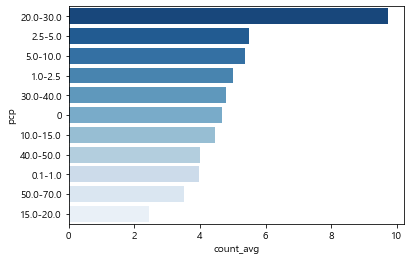

In [16]:
sns.barplot(data=df.sort_values(by='count_avg', ascending=False), x='count_avg', y='pcp', palette='Blues_r');

- 시간당 강우량 20-30mm, 2.5-5.0mm, 5.0-10.0mm 등의 순서로 평균 배달건수가 가장 많다.

In [18]:
# 날씨별 시간당 평균 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select rain_type, avg(count) \
    from delivery \
    group by rain_type \
    order by avg(count) desc")
df = pd.DataFrame(cursor.fetchall(), columns=['rain_type','count_avg'])
df

,rain_type,count_avg
0,진눈개비,6.4941
1,눈,4.9888
2,비,4.7572
3,없음,4.6578
4,소나기,2.0000


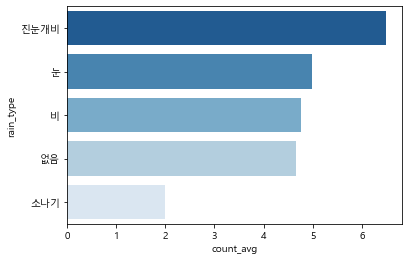

In [19]:
sns.barplot(data=df.sort_values(by='count_avg', ascending=False), x='count_avg', y='rain_type', palette='Blues_r');

- 아무 것도 내리지 않을 때보다, 비 그리고 특히 눈이 내릴 때 시간당 평균 배달건수가 더 많다.

In [119]:
# 배달유형별 총 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select dlvr_type, sum(count) \
    from delivery \
    group by dlvr_type \
    order by sum(count) desc")

df = pd.DataFrame(cursor.fetchall(), columns=['dlvr_type','count'])
df.head()

,dlvr_type,count
0,치킨,146659
1,돈까스/일식,138808
2,분식,81875
3,패스트푸드,77523
4,카페/디저트,69229


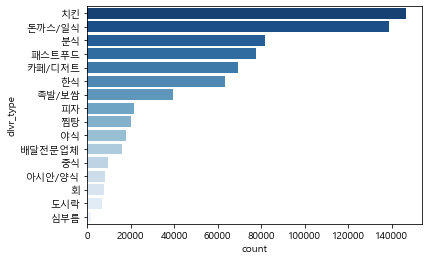

In [120]:
sns.barplot(data=df, x='count', y='dlvr_type', palette='Blues_r');

- 배달유형별로는 치킨, 돈까스/일식, 분식, 패스트푸드, 카페/디저트, 한식 등의 순서로 가장 많다.

In [121]:
# 요일별 총 배달건수
cursor = remote.cursor(buffered=True)
cursor.execute(
    "select dayweek, sum(count), avg(count)\
    from delivery\
    group by dayweek \
    order by sum(count) desc")

df = pd.DataFrame(cursor.fetchall(), columns=['dlvr_type','total_count','avg_count'])
df

,dlvr_type,total_count,avg_count
0,토요일,131742,5.2611
1,일요일,126393,5.2478
2,금요일,118092,4.9788
3,월요일,92931,4.3250
4,수요일,88800,4.3311
5,목요일,85978,4.1996
6,화요일,82813,4.0519


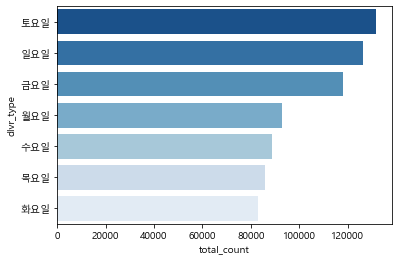

In [122]:
sns.barplot(data=df, x='total_count', y='dlvr_type', palette='Blues_r');

- 금요일과 주말(토툐일, 일요일)에 배달건수가 가장 많다.

---

## 결론

- 날이 추운 1월, 2월, 3월에 다른 달에 비해 배달주문이 더 많으며, 특히 영하 -10도에서 영상 10도 사이에서 시간별 평균 배달건수가 가장 높다.
- 비나 눈이 내릴 때가 아닌 시간과 비교하여 평균 배달주문건수가 더 많은데, 특히 강우량 20-30mm일 때 가장 많은 배달주문이 발생한다.
- 치킨, 돈까스/일식에 대한 배달주문 선호도가 높고, 이어서 분식과 패스트푸드가 높다.
- 금요일과 주말에 가장 많은 배달주문이 발생한다.